In [217]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [218]:
df=pd.read_csv('covid_country.csv')
print(df)

             Date             Country  Confirmed  Recovered  Deaths
0      2020-01-22         Afghanistan          0          0       0
1      2020-01-22             Albania          0          0       0
2      2020-01-22             Algeria          0          0       0
3      2020-01-22             Andorra          0          0       0
4      2020-01-22              Angola          0          0       0
...           ...                 ...        ...        ...     ...
23683  2020-05-26  West Bank and Gaza        429        365       3
23684  2020-05-26      Western Sahara          9          6       1
23685  2020-05-26               Yemen        249         10      49
23686  2020-05-26              Zambia        920        336       7
23687  2020-05-26            Zimbabwe         56         25       4

[23688 rows x 5 columns]


In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       23688 non-null  object
 1   Country    23688 non-null  object
 2   Confirmed  23688 non-null  int64 
 3   Recovered  23688 non-null  int64 
 4   Deaths     23688 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 925.4+ KB


In [220]:
df.describe()

,Confirmed,Recovered,Deaths
count,2.368800e+04,23688.000000,23688.000000
mean,7.969368e+03,2581.801714,526.935030
std,5.842109e+04,15143.101257,3992.815956
min,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000,0.000000
50%,1.800000e+01,1.000000,0.000000
75%,7.300000e+02,123.000000,13.000000
max,1.680913e+06,384902.000000,98913.000000


In [221]:
df.columns

Index(['Date', 'Country', 'Confirmed', 'Recovered', 'Deaths'], dtype='object')

In [222]:
df.dtypes

Date         object
Country      object
Confirmed     int64
Recovered     int64
Deaths        int64
dtype: object

In [223]:
df.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

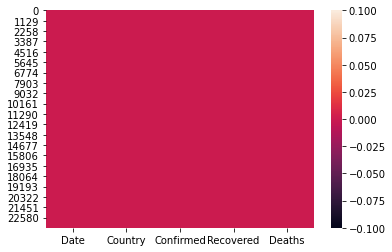

In [224]:
sns.heatmap(df.isnull())

Confirmed       AxesSubplot(0.125,0.125;0.133621x0.755)
Recovered    AxesSubplot(0.285345,0.125;0.133621x0.755)
Deaths        AxesSubplot(0.44569,0.125;0.133621x0.755)
dtype: object

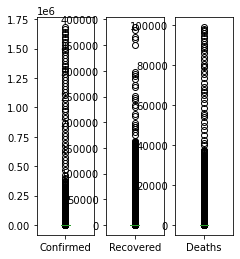

In [225]:
df.plot(kind='box',subplots=True,layout=(1,5))

In [226]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Country']=le.fit_transform(df['Country'].astype(str))

In [227]:
df

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,0,0,0,0
1,2020-01-22,1,0,0,0
2,2020-01-22,2,0,0,0
3,2020-01-22,3,0,0,0
4,2020-01-22,4,0,0,0
...,...,...,...,...,...
23683,2020-05-26,183,429,365,3
23684,2020-05-26,184,9,6,1
23685,2020-05-26,185,249,10,49
23686,2020-05-26,186,920,336,7


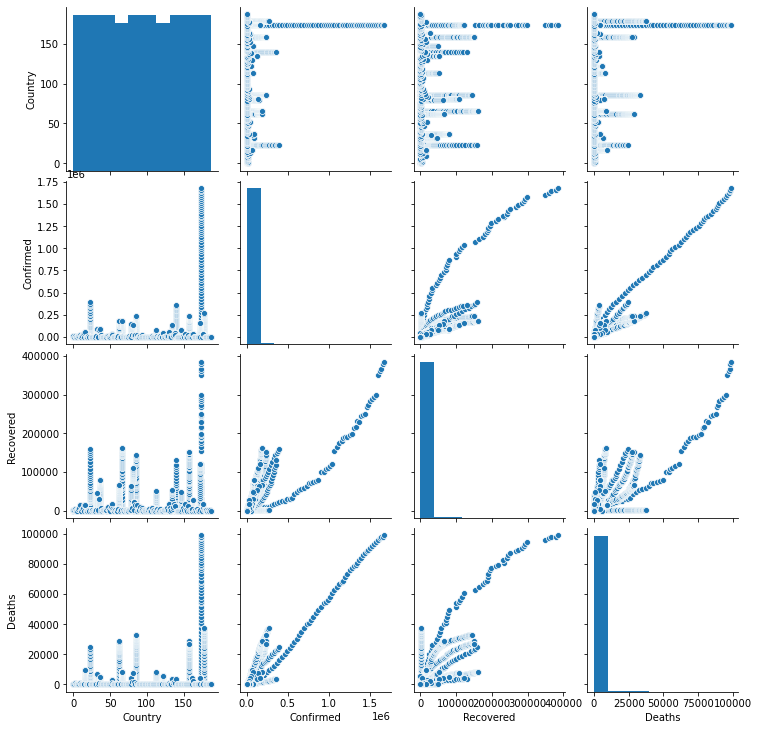

In [228]:
sns.pairplot(df)

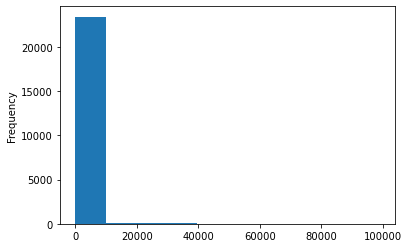

In [229]:
df['Deaths'].plot.hist()

In [230]:
import datetime
df['Date'] = pd.to_datetime(df['Date'])

In [231]:
df['Date']

0       2020-01-22
1       2020-01-22
2       2020-01-22
3       2020-01-22
4       2020-01-22
           ...    
23683   2020-05-26
23684   2020-05-26
23685   2020-05-26
23686   2020-05-26
23687   2020-05-26
Name: Date, Length: 23688, dtype: datetime64[ns]

In [232]:
df_date=pd.DataFrame()
df_date['month']=df['Date'].dt.month_name()
df_date['year']=df['Date'].dt.year
df_date['day']=df['Date'].dt.day_name()
df_date['Deaths']=df['Deaths']



In [233]:
df_date

,month,year,day,Deaths
0,January,2020,Wednesday,0
1,January,2020,Wednesday,0
2,January,2020,Wednesday,0
3,January,2020,Wednesday,0
4,January,2020,Wednesday,0
...,...,...,...,...
23683,May,2020,Tuesday,3
23684,May,2020,Tuesday,1
23685,May,2020,Tuesday,49
23686,May,2020,Tuesday,7


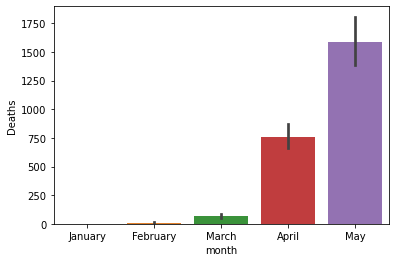

In [234]:
sns.barplot(x='month',y='Deaths',data=df_date)
plt.show()

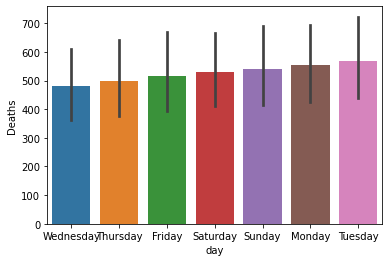

In [235]:
sns.barplot(x='day',y='Deaths',data=df_date)
plt.show()

In [236]:
df_date.drop(['day'],axis=1,inplace=True)

In [237]:
df_date

,month,year,Deaths
0,January,2020,0
1,January,2020,0
2,January,2020,0
3,January,2020,0
4,January,2020,0
...,...,...,...
23683,May,2020,3
23684,May,2020,1
23685,May,2020,49
23686,May,2020,7


In [238]:
df_date.drop(['Deaths'],axis=1,inplace=True)
df_date

,month,year
0,January,2020
1,January,2020
2,January,2020
3,January,2020
4,January,2020
...,...,...
23683,May,2020
23684,May,2020
23685,May,2020
23686,May,2020


In [239]:
df.drop(['Date'],axis=1,inplace=True)

In [240]:
cov=pd.concat([df,df_date],axis=1)
cov

,Country,Confirmed,Recovered,Deaths,month,year
0,0,0,0,0,January,2020
1,1,0,0,0,January,2020
2,2,0,0,0,January,2020
3,3,0,0,0,January,2020
4,4,0,0,0,January,2020
...,...,...,...,...,...,...
23683,183,429,365,3,May,2020
23684,184,9,6,1,May,2020
23685,185,249,10,49,May,2020
23686,186,920,336,7,May,2020


In [241]:
cov['month']=le.fit_transform(cov['month'].astype(str))

In [242]:
cov

,Country,Confirmed,Recovered,Deaths,month,year
0,0,0,0,0,2,2020
1,1,0,0,0,2,2020
2,2,0,0,0,2,2020
3,3,0,0,0,2,2020
4,4,0,0,0,2,2020
...,...,...,...,...,...,...
23683,183,429,365,3,4,2020
23684,184,9,6,1,4,2020
23685,185,249,10,49,4,2020
23686,186,920,336,7,4,2020


In [243]:
cov.skew()

Country       0.000000
Confirmed    18.674502
Recovered    10.662286
Deaths       14.218167
month         0.024769
year          0.000000
dtype: float64

In [244]:
import numpy as np
for col in cov.columns:
    if cov.skew().loc[col]>0.55:
        cov[col]=np.sqrt(cov[col])

In [245]:
cov.skew()

Country      0.000000
Confirmed    6.226575
Recovered    5.241669
Deaths       6.736065
month        0.024769
year         0.000000
dtype: float64

In [246]:
x=cov.drop(['Deaths'],axis=1)
x.head()

,Country,Confirmed,Recovered,month,year
0,0,0.0,0.0,2,2020
1,1,0.0,0.0,2,2020
2,2,0.0,0.0,2,2020
3,3,0.0,0.0,2,2020
4,4,0.0,0.0,2,2020


In [247]:
x.isnull().sum()

Country      0
Confirmed    0
Recovered    0
month        0
year         0
dtype: int64

In [248]:
y=cov['Deaths'].values
y

array([0.        , 0.        , 0.        , ..., 7.        , 2.64575131,
       2.        ])

In [249]:
x.shape

(23688, 5)

In [250]:
y.shape

(23688,)

In [251]:
y=y.reshape(-1,1)
y.shape

(23688, 1)

In [252]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [253]:
x_train.shape

(15870, 5)

In [254]:
y_train.shape

(15870, 1)

In [255]:
x_test.shape

(7818, 5)

In [256]:
y_test.shape

(7818, 1)

In [257]:
lm=LinearRegression()

In [258]:
lm.fit(x_train,y_train)

LinearRegression()

In [259]:
lm.coef_

array([[-0.00272983,  0.26244826, -0.03067214, -0.2526224 ,  0.        ]])

In [260]:
lm.intercept_

array([-0.73627221])

In [261]:
lm.score(x_train,y_train)

0.8779875687301345

In [262]:
from sklearn.metrics import r2_score
pred=lm.predict(x_test)
print(r2_score(y_test,pred))

0.8929222423766466


In [263]:
print("Predicted result price:",pred)
print("actual price:",y_test)

Predicted result price: [[-1.10900715]
 [-0.71366448]
 [-1.40928849]
 ...
 [ 9.26008221]
 [-1.81898923]
 [ 0.27687586]]
actual price: [[0.]
 [0.]
 [0.]
 ...
 [8.]
 [0.]
 [1.]]


In [264]:
print("error:")

print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:', mean_squared_error(y_test,pred))

print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 3.03819386416365
Mean squared error: 54.41658241469112
Root Mean squared error: 7.376759614809956


In [265]:
import joblib
joblib.dump(lm,'covid_lm.obj')

['covid_lm.obj']